# Linear Classification using Breast Cancer data

In this notebook is a simple implementation of using TensorFlow to build a linear regression model to classify whether a patient has breast cancer or not.


## Part 1: Creating model


### Importing necessary packages and functions

This linear classification uses a couple of packages and functions, their usage is explained bellow:

- `numpy`: rounding predictions and calculating accuracy manually
- `tensorflow`: used to create model (the model itself with `Sequential` and its layers, with `Input` and `Dense`)
- `matplotlib`: plotting accuracy and loss of model after training
- `sklearn`:
  - `datasets`:
    - `load_breast_cancer`: function to load the breast cancer data
  - `preprocessing`:
    - `StandardScaler`: class used to standardize the data in a dataset
  - `model_selection`:
    - `train_test_split`: function to split data into training and testing


In [1]:
# Importing packages and functions
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Exploratory data analysis

In this section we go through the data, making note of some of its most important characteristics.


In [2]:
# Loading data
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
# Checking data type
type(data)

sklearn.utils._bunch.Bunch

`sklearn`'s bunch is an extension on `dict` and it basically adds the ability of accessing a specific key as if it was an attribute.

```python
from sklearn.utils import Bunch

# Creating bunch
b = Bunch(a=1, b=2)

# Both output '2'
print(b['b'])
print(b.b)
```


In [4]:
# Getting data's keys (like a dict)
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

The data has shape $N \times D$, where $N$ is the number of entries, and $D$ is the number of features each entry has.


In [5]:
# Getting data's shape
data.data.shape  # N, D

(569, 30)

This is a binary classification problem so the algorithm is supposed to predict between has breast cancer (1) or doesn't breast cancer (0)


In [6]:
# Getting correct labels for test data
print(data.target)

# Getting target names
print(data.target_names)  # 0, 1

# Getting data's shape
print(data.target.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [7]:
# Names of features (D)
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.data,
    data.target,
    test_size=0.33,
)

In [9]:
# Getting number of entries and number of features respectively
N, D = X_train.shape

#### Scaling the data

Standardization is a pre-processing technique that goes through the dataset and gives it mean 0 and variance 1. This process improves the convergence rate in the optimization process.

The `fit_transform` method does the fit and transform process of standardization in one single step. It finds the parameters's mean and standard deviation for each column and standardizes the data in order for it to have mean 0 and variance 1.


In [10]:
# Scaling the data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

### Creating, compiling and training model

In this step we're going to create the model (using Keras's `Sequential`), compile it, and train it.


#### Creating model

The model is composed of 2 layers, an input layer, `Input` (that is hardly a layer, simply a formality) that defines the dimensionality of the data that goes into the model, and initializes the parameters. The other type of layer is a dense layer, `Dense` (that in our case only has one neuron, since we're just using it for a linear classification) with a sigmoid activation function.


In [11]:
# Creating sequential model
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Input(shape=(D,)),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ],
)

#### Compiling model

This is where we set a couple of important hyperparameters, namely the optimizer, the loss, and the evaluation metrics to be used by the model.

##### Function's arguments

`optimizer` is the process used by the model in the "learning" process.

`loss` is the function used to calculate the distance between the correct prediction and what the model has predicted, in order to adjust the weights and biases to improve the model's results.

`metrics` argument takes a list of how the model's predictions should be evaluated. For a problem such as linear classification, accuracy is a good metric, whereas if this was a linear regression problem, this metric would be close to useless, and we would opt for some other metric, such as MSE (mean squared error). The reason why accuracy is a bad metric for a linear regression model, is that instead of representing the closeness to a value, it simply represents whether the model has predicted correctly or not. This implies that if the correct value was 11, and the model predicted 10.99, it would amount to a wrong answer, and be assigned a 0 even though it is almost a perfect prediction, whereas if we were using MSE the value would be close to 100%.


In [12]:
# Compiling model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

In [13]:
# Training model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7135 - accuracy: 0.5722 - val_loss: 0.6847 - val_accuracy: 0.6702
Epoch 2/100
12/12 [==============================] - 0s 1ms/step - loss: 0.6511 - accuracy: 0.6352 - val_loss: 0.6200 - val_accuracy: 0.7234
Epoch 3/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5955 - accuracy: 0.6798 - val_loss: 0.5639 - val_accuracy: 0.7660
Epoch 4/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5490 - accuracy: 0.7349 - val_loss: 0.5149 - val_accuracy: 0.7766
Epoch 5/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5086 - accuracy: 0.7953 - val_loss: 0.4727 - val_accuracy: 0.8298
Epoch 6/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4746 - accuracy: 0.8136 - val_loss: 0.4359 - val_accuracy: 0.8617
Epoch 7/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4443 - accuracy: 0.8294 - val_loss: 0.4044 - val_accuracy: 0.8830
Epoch 8/100
1

### Evaluating model

Here, we'll evaluate the accuracy of the model on the training and the test data, in order to get a good understanding of its overall performance. First, we'll evaluate the model's result on the training data. We expect this to get a higher accuracy for it has trained and improved by using this data.

We observe that the model got a loss of around $0.1$ and accuracy of around $97.6 \% $ on the training data, this is good score for a simple model. The model got even better results on the test data, with a $0.06$ for loss and $99\%$ for accuracy, although this may be unexpected at first, it is probably due to the decreased amount of data entries for the test, when compared to the training data entries.

We also plot the loss and accuracy, for the training and validation datasets.


In [14]:
# Evaluating training score
print('Train Score:', model.evaluate(X_train, y_train))

12/12 [==============================] - 0s 336us/step - loss: 0.1070 - accuracy: 0.9764
Train Score: [0.10702037811279297, 0.9763779640197754]


In [15]:
# Evaluating test score
print('Test Score:', model.evaluate(X_test, y_test))

6/6 [==============================] - 0s 475us/step - loss: 0.0653 - accuracy: 0.9947
Test Score: [0.06526591628789902, 0.9946808218955994]


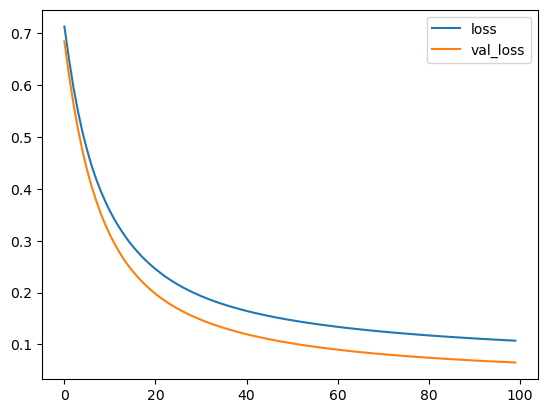

In [16]:
# Plotting loss throughout the training process
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

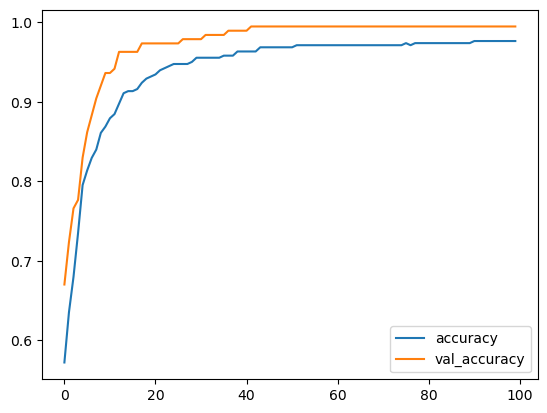

In [17]:
# Plotting accuracy throughout the training process
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

## Part 2: Making predictions

In this section, we basically only use the model to make predictions, using the `.predict` method, and compare those predictions to the actual labels to evaluate the model (also using the `evaluate` method, as we used it before).


In [18]:
# Getting and printing predictions
P = model.predict(X_test)
P

6/6 [==============================] - 0s 460us/step


array([[9.98357952e-01],
       [9.48522151e-01],
       [3.87554318e-01],
       [1.90347195e-01],
       [9.98182893e-01],
       [8.01679611e-01],
       [1.85303561e-11],
       [3.69805307e-03],
       [9.95624781e-01],
       [7.88157523e-01],
       [8.07791585e-05],
       [8.30829442e-01],
       [7.97028005e-01],
       [9.84237313e-01],
       [1.15157459e-02],
       [6.78638602e-03],
       [3.67127880e-02],
       [8.76520932e-01],
       [9.71957743e-01],
       [3.64911160e-03],
       [9.92079079e-01],
       [7.94064254e-02],
       [1.26846237e-02],
       [9.33974147e-01],
       [4.83469164e-04],
       [9.89429653e-01],
       [9.96106505e-01],
       [3.55318116e-05],
       [9.32688057e-01],
       [9.74971771e-01],
       [9.90674794e-01],
       [9.70894456e-01],
       [2.13077813e-02],
       [9.98266518e-01],
       [9.99725223e-01],
       [9.00101906e-04],
       [2.13553067e-02],
       [9.63742961e-04],
       [9.22024071e-01],
       [9.97524858e-01],


In [19]:
# Rounding predictions
P = np.round(P).flatten()
P

array([1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       0.], dtype=float32)

In [20]:
# Showing accuracy manually calculated and through the evaluate method
print('Manually calculated accuracy:', np.mean(P == y_test))
print('Evaluate output:', model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9946808510638298
6/6 [==============================] - 0s 484us/step - loss: 0.0653 - accuracy: 0.9947
Evaluate output: [0.06526591628789902, 0.9946808218955994]


## Part 3: Save and load model

Finally, we'll save the model, using `.save` and passing it the path to the saved file, and load that same loaded model, using the `load_model` function.


In [21]:
# Saving model
model.save('models/linear_classifier.keras')

In [ ]:
# Loading model
model = tf.keras.models.load_model('models/linear_classifier.keras')
print(model.layers)
model.evaluate(X_test, y_test)